In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import lag_plot
from statsmodels.tsa.seasonal import seasonal_decompose
from datetime import datetime



In [42]:
df=pd.read_csv('DATASET/Bitcoin History.csv')

In [43]:
df

,Date,Price,Open,High,Low,Vol.,Change %
0,"Feb 09, 2024","47,545.4","45,293.3","47,710.2","45,254.2",86.85K,4.97%
1,"Feb 08, 2024","45,293.3","44,346.2","45,579.2","44,336.4",66.38K,2.15%
2,"Feb 07, 2024","44,339.8","43,088.4","44,367.9","42,783.5",48.57K,2.91%
3,"Feb 06, 2024","43,087.7","42,697.6","43,375.5","42,566.8",33.32K,0.91%
4,"Feb 05, 2024","42,697.2","42,581.4","43,532.2","42,272.5",39.26K,0.27%
...,...,...,...,...,...,...,...
4950,"Jul 22, 2010",0.1,0.1,0.1,0.1,2.16K,0.00%
4951,"Jul 21, 2010",0.1,0.1,0.1,0.1,0.58K,0.00%
4952,"Jul 20, 2010",0.1,0.1,0.1,0.1,0.26K,0.00%
4953,"Jul 19, 2010",0.1,0.1,0.1,0.1,0.57K,0.00%


In [46]:
import pandas as pd

# Load your dataset
# df = pd.read_csv('your_dataset.csv')

# Handle Missing Values
missing_values = df.isnull().sum()
print("Columns with missing values:")
print(missing_values)

# Convert 'Vol.' column to numeric after removing commas and handling 'K' and 'M' suffixes
# Convert 'Vol.' column to numeric after removing commas and handling 'K', 'M', and 'B' suffixes
def convert_volume(vol):
    vol = vol.replace(',', '')
    if vol.endswith('K'):
        return float(vol[:-1]) * 1000
    elif vol.endswith('M'):
        return float(vol[:-1]) * 1000000
    elif vol.endswith('B'):
        return float(vol[:-1]) * 1000000000
    else:
        return float(vol)

df['Vol.'] = df['Vol.'].apply(convert_volume)




Columns with missing values:
Date        0
Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64


ValueError: could not convert string to float: '-'

In [27]:
numeric_columns = ['Price', 'Open', 'High', 'Low', 'Vol.']

# Convert numeric columns to numeric type
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Fill NaN values in numeric columns with median
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].median())

print (df)

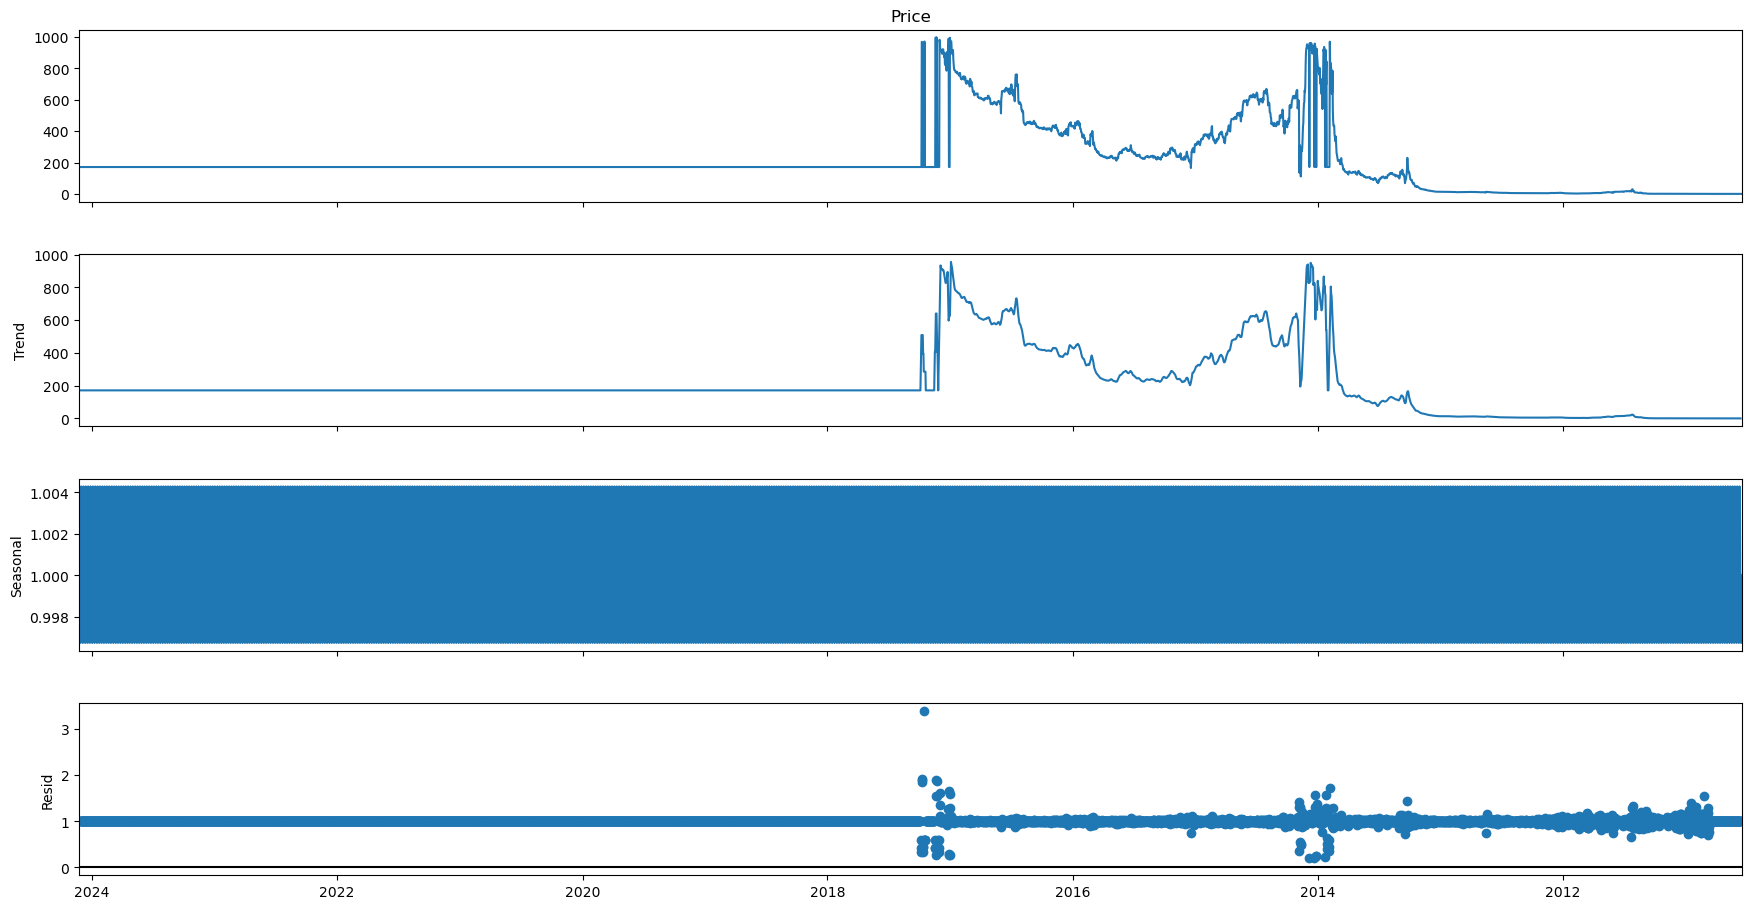

In [28]:
# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Set 'Date' column as index
df.set_index('Date', inplace=True)

# Perform seasonal decomposition
sea_dec = seasonal_decompose(df['Price'], model='multiplicative')

# Plot the decomposition
fig = sea_dec.plot()
fig.set_size_inches(20, 10)


2010-07-18 00:00:00 2024-02-09 00:00:00


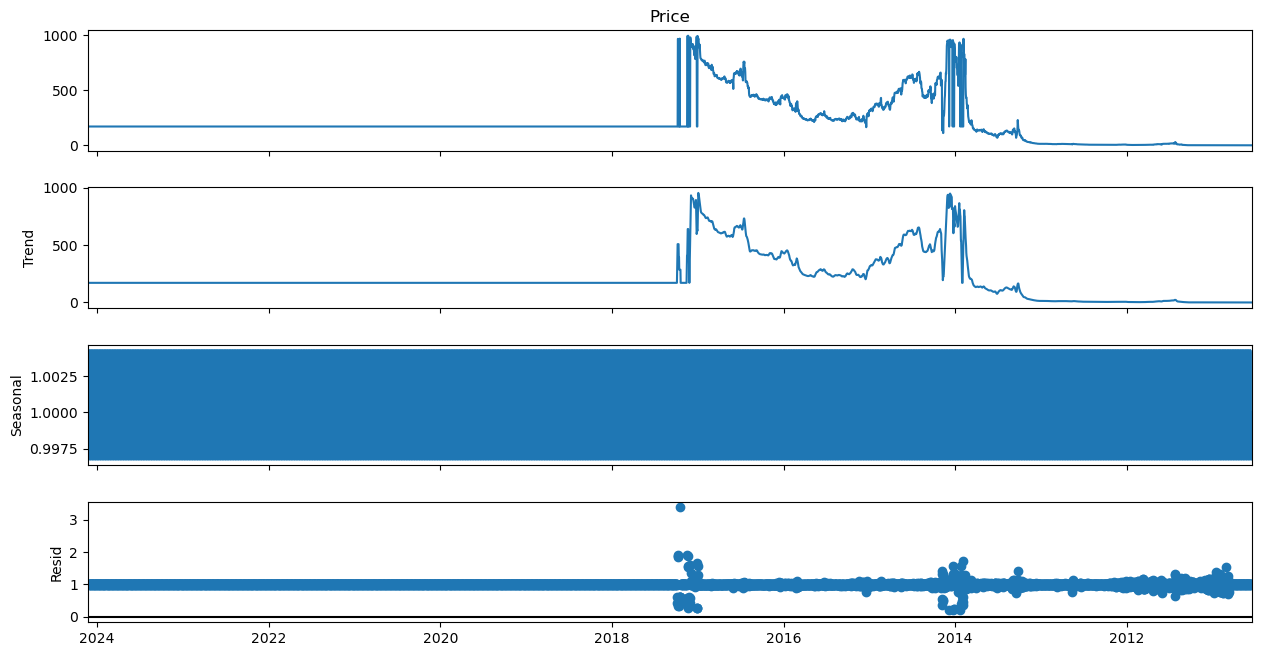

In [31]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming 'df' is your DataFrame and it has a datetime index.
# Replace 'appropriate_period' with actual period based on your data's seasonality.
decomposition = seasonal_decompose(df['Price'], model='multiplicative')

# Check the start and end of your data to ensure it's complete and properly indexed.
print(df.index.min(), df.index.max())

# Plot the decomposition
fig = decomposition.plot()
fig.set_size_inches(14, 7)
plt.show()


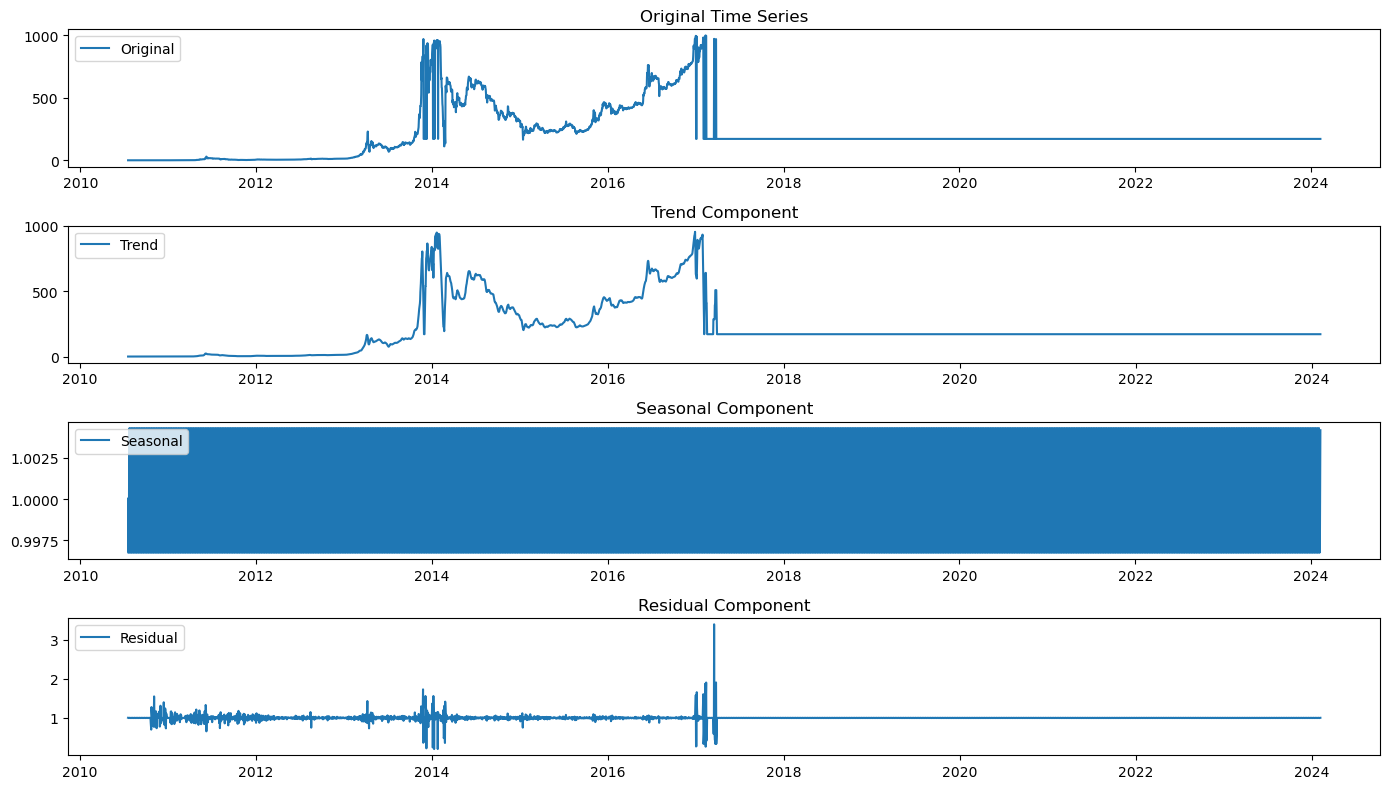

In [33]:
import matplotlib.pyplot as plt

# Perform seasonal decomposition
sea_dec = seasonal_decompose(df['Price'], model='multiplicative')

# Plot the decomposition components separately
plt.figure(figsize=(14, 8))

# Plot original time series
plt.subplot(4, 1, 1)
plt.plot(df.index, df['Price'], label='Original')
plt.legend(loc='upper left')
plt.title('Original Time Series')

# Plot trend component
plt.subplot(4, 1, 2)
plt.plot(df.index, sea_dec.trend, label='Trend')
plt.legend(loc='upper left')
plt.title('Trend Component')

# Plot seasonal component
plt.subplot(4, 1, 3)
plt.plot(df.index, sea_dec.seasonal, label='Seasonal')
plt.legend(loc='upper left')
plt.title('Seasonal Component')

# Plot residual component
plt.subplot(4, 1, 4)
plt.plot(df.index, sea_dec.resid, label='Residual')
plt.legend(loc='upper left')
plt.title('Residual Component')

plt.tight_layout()
plt.show()


In [7]:
# Ensure all conversions are correctly applied before splitting the data
def clean_and_convert(df):
    # Make a copy of the dataframe to avoid modifying the original data
    df_cleaned = df.copy()
    
    # Convert string columns with numeric values containing commas
    for column in ['Price', 'Open', 'High', 'Low']:
        # Remove commas and convert to float, if they are of type object (string)
        if df_cleaned[column].dtype == 'object':
            df_cleaned[column] = df_cleaned[column].str.replace(',', '').astype(float)
    
    # Convert 'Vol.' column from '123.45K' to numeric value '123450'
    if df_cleaned['Vol.'].dtype == 'object':
        df_cleaned['Vol.'] = df_cleaned['Vol.'].str.replace('K', '').astype(float) * 1000
    
    return df_cleaned

# Apply cleaning and conversion to the full dataset before splitting
df = clean_and_convert(df)

# Now, split data into train and test sets
train_size = int(len(df) * 0.8)  # Adjust this as needed
train, test = df.iloc[:train_size], df.iloc[train_size:]

# No need to reapply the string to numeric conversion here, since we've handled it above


In [10]:
print(df.columns)


Index(['Price', 'Open', 'High', 'Low', 'Vol.', 'Change %'], dtype='object')


In [11]:
from pmdarima import auto_arima

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=42932.178, Time=5.72 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=43585.476, Time=0.06 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=43295.228, Time=0.78 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=43113.783, Time=1.75 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=43583.476, Time=0.05 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=42930.174, Time=4.80 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=42932.549, Time=1.59 sec
 ARIMA(2,1,2)(0,0,2)[12] intercept   : AIC=42932.156, Time=32.10 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=42930.164, Time=8.03 sec
 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=42932.181, Time=29.32 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=42934.183, Time=32.76 sec
 ARIMA(1,1,2)(1,0,0)[12] intercept   : AIC=42920.056, Time=4.11 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=42926.806, Time=1.30 sec
 ARIMA(1,1,2)(2,0,0)[12] intercept   : AIC=42922.055, Time=22.00 sec
 

C:\Users\sugip\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\sugip\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


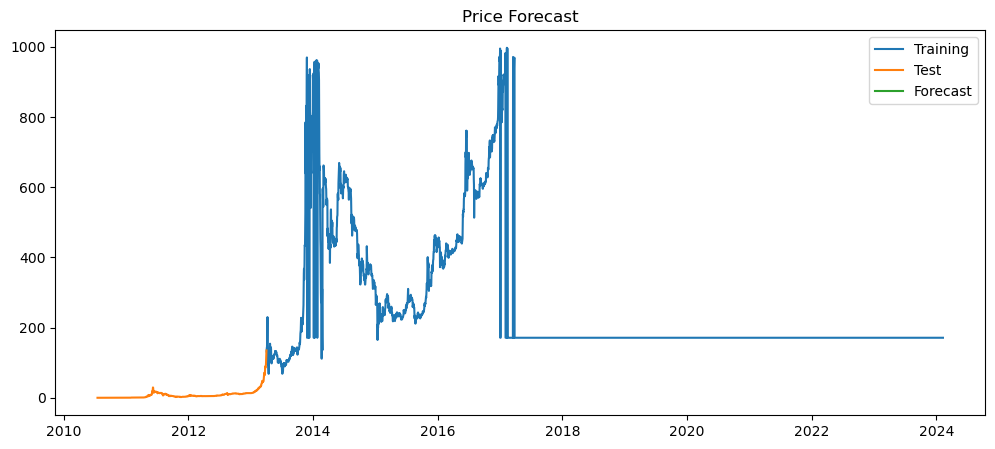

In [12]:
auto_model = auto_arima(train['Price'], 
                        seasonal=True,  # Set to True if the series is suspected to be seasonal
                        m=12,           # The seasonal period (e.g., 12 for monthly data)
                        trace=True, 
                        error_action='ignore', 
                        suppress_warnings=True)

# Summary of the model
print(auto_model.summary())

# Forecasting
forecast = auto_model.predict(n_periods=len(test))
forecast = pd.Series(forecast, index=test.index)

# Plot the results
plt.figure(figsize=(12, 5))
plt.plot(train['Price'], label='Training')
plt.plot(test['Price'], label='Test')
plt.plot(forecast, label='Forecast')
plt.title('Price Forecast')
plt.legend()
plt.show()

In [13]:
import warnings
warnings.filterwarnings("ignore")


In [14]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(test['Price'], forecast)
mae = mean_absolute_error(test['Price'], forecast)
print(f'MSE: {mse}, MAE: {mae}')


ValueError: Input contains NaN.

In [15]:
# Check for NaN values in the dataset
print(df.isnull().sum())

# If NaN values are present, you might want to fill them or drop them
df.fillna(method='ffill', inplace=True)  # Forward fill
# OR
df.dropna(inplace=True)  # Remove rows with NaN values


Price          0
Open           0
High           0
Low            0
Vol.        4955
Change %       0
dtype: int64


In [16]:
# Convert columns to numeric and handle errors
for column in ['Price', 'Open', 'High', 'Low', 'Vol.']:
    df[column] = pd.to_numeric(df[column].str.replace(',', '').str.replace('K', '').fillna('0'), errors='coerce')

# After conversion, again check for NaNs
print(df.isnull().sum())

# Handle any new NaNs, likely introduced during conversion
df.fillna(method='ffill', inplace=True)  # Forward fill as an example


AttributeError: Can only use .str accessor with string values!

In [17]:
# Check for NaN values in train and test sets
print(train.isnull().sum(), '\n', test.isnull().sum())

# Handle NaN values if any
train.fillna(method='ffill', inplace=True)
test.fillna(method='ffill', inplace=True)


Price          0
Open           0
High           0
Low            0
Vol.        3964
Change %       0
dtype: int64 
 Price         0
Open          0
High          0
Low           0
Vol.        991
Change %      0
dtype: int64


In [18]:
# Before calling auto_arima or forecast, ensure no NaNs
assert not train['Price'].isnull().any()
assert not test['Price'].isnull().any()


In [19]:
# First, ensure no initial NaN values are in 'Vol.' without incorrect conversion
df['Vol.'] = df['Vol.'].str.replace('K', '').replace('', '0')  # Replace empty strings with '0'

# Convert 'Vol.' from strings like '1.23K' to numeric, if it's still a string column
if df['Vol.'].dtype == object:
    df['Vol.'] = df['Vol.'].apply(lambda x: float(x.replace(',', '')) if isinstance(x, str) else x)

# Convert other columns to numeric if they are still in string format
for column in ['Price', 'Open', 'High', 'Low']:
    if df[column].dtype == object:
        df[column] = df[column].str.replace(',', '').astype(float)

# Now, fill NaN values after all conversions (if there's still any)
df.fillna(method='ffill', inplace=True)

# Confirm no more NaN values after handling
print(df.isnull().sum())


AttributeError: Can only use .str accessor with string values!

In [20]:
# Correct approach to handle 'Vol.' column if it might not be a string
if df['Vol.'].dtype == object:  # Ensures 'Vol.' is indeed string type before applying string methods
    df['Vol.'] = df['Vol.'].str.replace('K', '').fillna('0')  # Replace 'K' and fill NaNs with '0'
    df['Vol.'] = pd.to_numeric(df['Vol.'], errors='coerce')  # Convert to numeric, making non-numeric values NaN

# Then, handle other potentially string columns safely
for column in ['Price', 'Open', 'High', 'Low']:
    if df[column].dtype == object:  # Only apply string operations if the column is of string type
        df[column] = pd.to_numeric(df[column].str.replace(',', ''), errors='coerce')

# After conversions, fill any NaN values that might have been introduced
df.fillna(method='ffill', inplace=True)

# Check to ensure no NaN values remain
print(df.isnull().sum())


Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=42932.178, Time=5.70 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=43585.476, Time=0.05 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=43295.228, Time=0.72 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=43113.783, Time=1.73 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=43583.476, Time=0.04 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=42930.174, Time=4.68 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=42932.549, Time=1.61 sec
 ARIMA(2,1,2)(0,0,2)[12] intercept   : AIC=42932.156, Time=29.87 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=42930.164, Time=8.38 sec
 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=42932.181, Time=26.39 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=42934.183, Time=28.69 sec
 ARIMA(1,1,2)(1,0,0)[12] intercept   : AIC=42920.056, Time=4.45 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=42926.806, Time=1.38 sec
 ARIMA(1,1,2)(2,0,0)[12] intercept   : AIC=42922.055, Time=19.37 sec
 

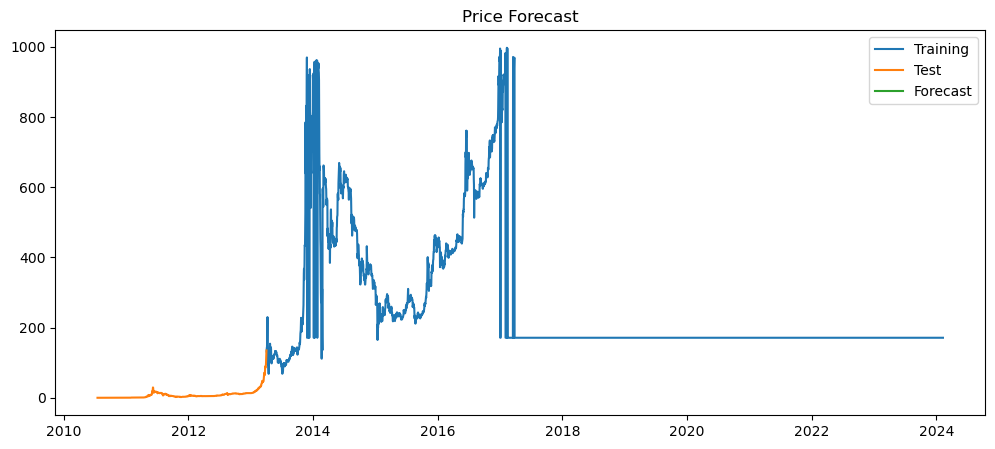

In [21]:
auto_model = auto_arima(train['Price'], 
                        seasonal=True,  # Set to True if the series is suspected to be seasonal
                        m=12,           # The seasonal period (e.g., 12 for monthly data)
                        trace=True, 
                        error_action='ignore', 
                        suppress_warnings=True)

# Summary of the model
print(auto_model.summary())

# Forecasting
forecast = auto_model.predict(n_periods=len(test))
forecast = pd.Series(forecast, index=test.index)

# Plot the results
plt.figure(figsize=(12, 5))
plt.plot(train['Price'], label='Training')
plt.plot(test['Price'], label='Test')
plt.plot(forecast, label='Forecast')
plt.title('Price Forecast')
plt.legend()
plt.show()

In [22]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(test['Price'], forecast)
mae = mean_absolute_error(test['Price'], forecast)
print(f'MSE: {mse}, MAE: {mae}')


ValueError: Input contains NaN.